# Farouq El-Abbass, 49412

# Advanced Data Analysis - Assignment 2

This notebook contains the **Assignment 2** of the Advanced Data Analysis course.

The topic of the assignment consists in performing linear regression on National Health and Nutrition Examination data.

### DEADLINE: 10-October-2021

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* You don't need to create additional cells. Try to use the ones that are already available
* The notebook should be delivered with the outputs already available


# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file 

In [1]:
# This code cell does not need to be changed
import os
import pandas as pd

dataFileName = os.path.join("../assignment2", "children.csv")
dataDF = pd.read_csv(dataFileName)

# Assignment

In this assignment, we aim to predict the weight of a children until 24 monthts old based on child age. 

In [2]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import os

x = dataDF[['age']]
y = dataDF[['weight']]

## Question 1

In this question, we aim to identify the best polynomial degree. 

### **1.a)** Find the best polynomial degree from 1 to 12 (6 points out of 20). 


In [3]:
from sklearn.model_selection import cross_val_score
import sklearn

def trans_data(degree):
    polynomial_features = PolynomialFeatures(degree)
    poly_trans = polynomial_features.fit_transform(x)
    input_df = pd.DataFrame(poly_trans)
    return input_df

model = linear_model.LinearRegression()

df = pd.DataFrame({'degree' : range(1, 10, 1)})
df['Error'] = df['degree'].apply(lambda x: cross_val_score(model, trans_data(x), y, scoring='neg_root_mean_squared_error', cv=10).mean())
df = df.set_index("degree")
print("Best degree with closer error to 0 is: ")
print(str(df.nlargest(1,"Error")))

Best degree with closer error to 0 is: 
           Error
degree          
8      -1.173805


### **1.b)** Plot the results obtained (for each degree the score obtained) (2 points out of 20). 

<AxesSubplot:xlabel='degree'>

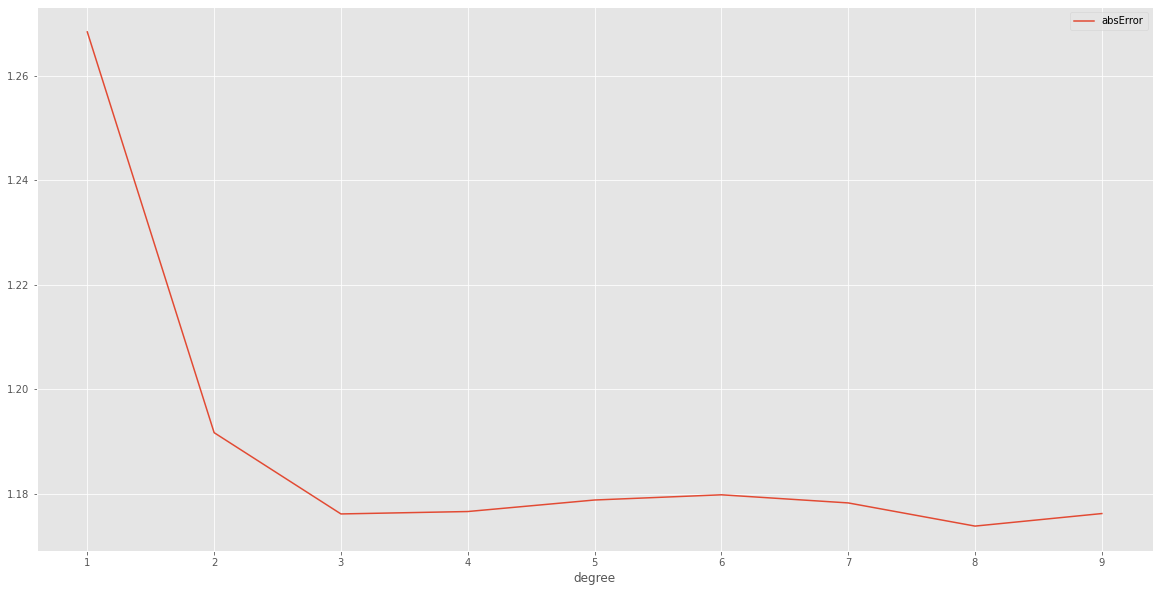

In [4]:
# Solve question here.
df["absError"]=abs(df[["Error"]])
df.plot(figsize=(20,10), y="absError")

### **1.c)** Why k-fold cross validation approach is important to evaluate the performance of predictive models? (1 point out of 20)

Answer: **_K-fold cross-validation is the best approach to avoid overfitting our model, especially here it helped us to choose the best degree for our model prediction with the smallest error before the error diverges._**

## Question 2 (10 points out of 20)

Here, we aim to build a model to predict the weigth of children based on their age.

### **2.a)** Using the best degree found, find the coefficients of the best curve (4 points out of 20). 

In [5]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
from sklearn.model_selection import train_test_split
seed = 420

x_input = trans_data(8)
x_input["y"] = y
train_set, test_set = train_test_split(x_input, test_size = 0.2, random_state = seed)

train_set = train_set.sort_values(1)

train_input_df = train_set.iloc[:, 0:(len(train_set.columns)-1)]
y_train = train_set[["y"]]

test_input_df = test_set.iloc[:, 0:(len(test_set.columns)-1)]
y_test = test_set[["y"]]

model = linear_model.LinearRegression()
model.fit(train_input_df, y_train)

print("Coefficients: ")
print("Intercept= ", model.intercept_[0])
for i, coeff in (enumerate(model.coef_[0][1:])):
    print("Coeff"+str(i+1)+" = "+str(coeff))

Coefficients: 
Intercept=  4.627048674234201
Coeff1 = 0.9666633790206136
Coeff2 = -0.3425432686366791
Coeff3 = 0.1458628064910096
Coeff4 = -0.029848834868731716
Coeff5 = 0.0031303839286599086
Coeff6 = -0.000175287014070301
Coeff7 = 4.992103087679556e-06
Coeff8 = -5.683310222437399e-08


### **2.b)** Plot the train and test set and the model computed (3 points out of 20)

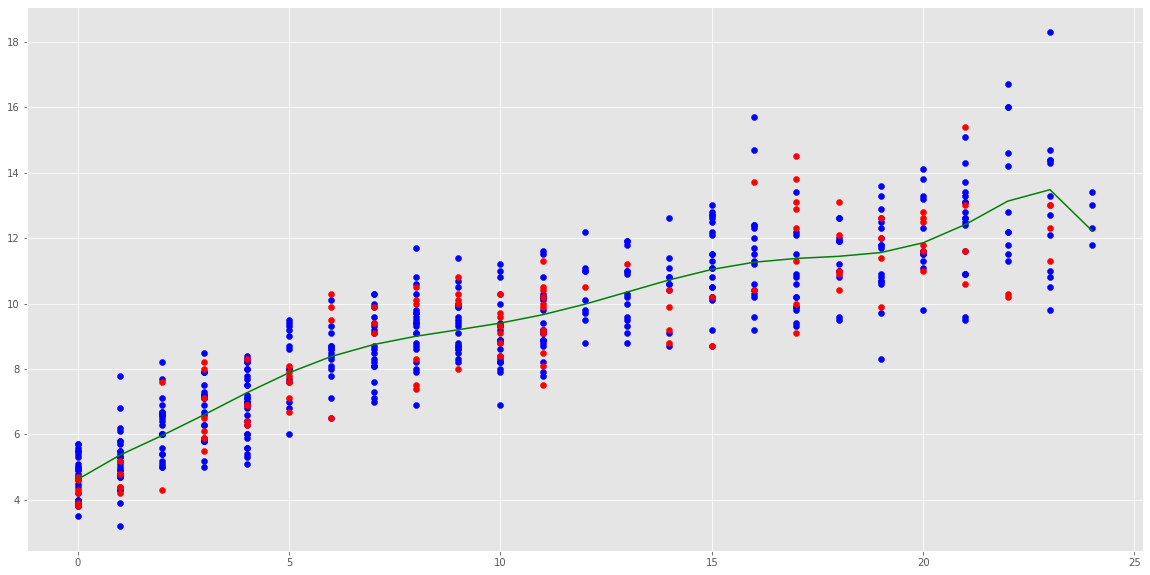

In [6]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
poly_model = model.predict(train_input_df)
poly_pred_test = model.predict(test_input_df)

plt.figure(figsize=(20,10))
plt.scatter(train_input_df.iloc[:,1], y_train, c = 'b') 
plt.scatter(test_input_df.iloc[:,1], y_test, c = 'r') 
plt.plot(train_input_df.iloc[:,1],poly_model, color = 'green')
plt.show()

### **2.c)** What is the mean squared error (MSE) on the test set? (1 point out of 20)

In [7]:
# Solve question here. Add a Markdown cell after this cell if you want to add 
# some comment on you solution.
from sklearn.metrics import mean_squared_error
print("MSE on the test set is: " 
      + str(mean_squared_error(poly_pred_test, y_test)))

MSE on the test set is: 1.4843834999241206


# Question 3 

### **3.a)** In the plot made in 2.b) represent also the uncertainty of the model achieved with different shades at the levels the confidence intervals of 95% and 99% (3 points out of 20). Discuss the results achieved.

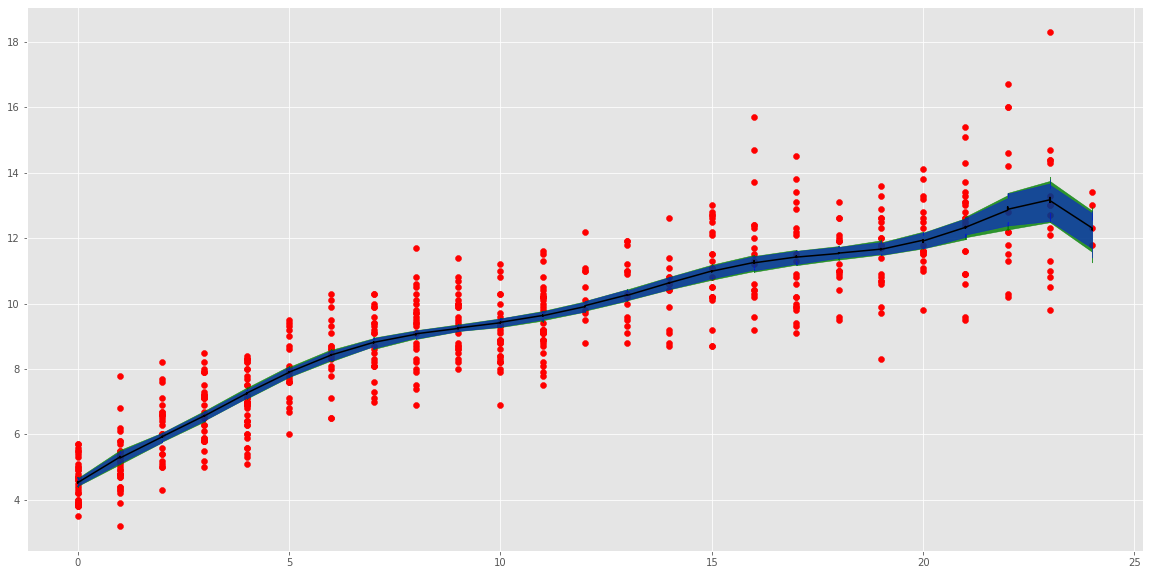

In [11]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
replicas = 100
sample = 400
df_unc = pd.DataFrame(x)
degree = 8

i = 0;
for _ in range(replicas):
    rep_data = dataDF.sample(sample) 
    rep_data = rep_data.sort_values('age')    
    polynomial_features = PolynomialFeatures(degree)

    x_poly = polynomial_features.fit_transform(rep_data[['age']])
    model = linear_model.LinearRegression()
    model.fit(x_poly, rep_data[['weight']])
    y_poly_unc = model.predict(x_poly)

    df_unc =  pd.concat([df_unc, pd.DataFrame(y_poly_unc, index = rep_data.index)], axis=1)
    df_unc = df_unc.sort_values('age')
    i = i + 1

plt.figure(figsize=(20,10))
plt.scatter(x, y, color='red')

df_unc['median'] = df_unc.iloc[:, 1:(replicas + 1)].quantile(0.5, axis = 1, interpolation = 'midpoint')
df_unc['p5'] = df_unc.iloc[:, 1:(replicas + 1)].quantile(0.025, axis = 1,interpolation = 'midpoint')
df_unc['p1'] = df_unc.iloc[:, 1:(replicas + 1)].quantile(0.005, axis = 1,interpolation = 'midpoint')
df_unc['p95'] = df_unc.iloc[:, 1:(replicas + 1)].quantile(0.975, axis = 1,interpolation = 'midpoint')
df_unc['p99'] = df_unc.iloc[:, 1:(replicas + 1)].quantile(0.995, axis = 1,interpolation = 'midpoint')


plt.plot(df_unc[['age']], df_unc[['median']], color = 'black')
plt.fill_between(df_unc[['age']].iloc[:,0], df_unc[['p1']].iloc[:,0], df_unc[['p99']].iloc[:,0], color='green',alpha=0.8)
plt.fill_between(df_unc[['age']].iloc[:,0], df_unc[['p5']].iloc[:,0], df_unc[['p95']].iloc[:,0], color='blue',alpha=0.5)

**Analytics:**
_For a certain sample size, at a certain number of replicas (around 100), choosing a bigger number of replicas give the same results.
The 99% confidence interval and 95% confidence interval are around really close to the median of the model, even closely confused, which means that we can count on our model to predict the weight of babies using their age._
_The dataset still contains some outliers which should be cleaned of outliers._


**Inference on babies weigth with age:**
_Babies grow faster in the first 5 months then after it slows down, and the model is dropping weights after 23 months with the lack of observations and the bootstrapp process and also the outliers._